In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
plt.rcParams['figure.figsize']=(20.0,10.0)

#Reading data
df1=pd.read_csv('loan_train.csv')
df1.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [2]:
df1.shape 

(346, 10)

In [3]:
df1.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)
df1

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [4]:
df1.head()


,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
loan_paid= df1['loan_status'].value_counts()['PAIDOFF']
print("The number of people who paid the loan are: ", loan_paid)

The number of people who paid the loan are:  260


In [6]:
loan_collection= df1['loan_status'].value_counts()['COLLECTION']
print("The number of people who have gone into collection are ", loan_collection)

The number of people who have gone into collection are  86


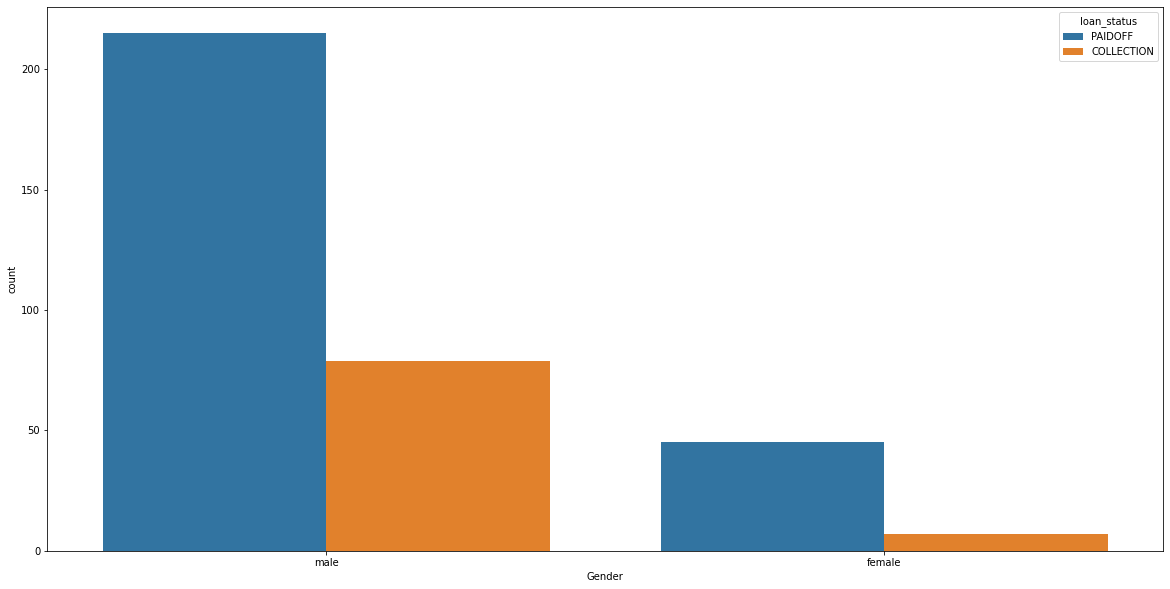

In [7]:
import seaborn as sns
sns.countplot(x='Gender', hue='loan_status' , data=df1)



In [8]:
cols = ['effective_date','due_date']
df1[cols] = df1[cols].apply(pd.to_datetime)
df1

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male


In [9]:
df1['dayofweek']= df1['effective_date'].dt.dayofweek
df1

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4
...,...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,6
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,6
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0


In [10]:
df1['weekend'] = df1['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df1.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [28]:
print('The number of people who have gone into collection are: ' + str(len(df1[df1['loan_status']=='COLLECTION'])))

The number of people who have gone into collection are: 86


In [11]:
df2=pd.get_dummies(df1['Gender'] )
df2.head(10)

,female,male
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


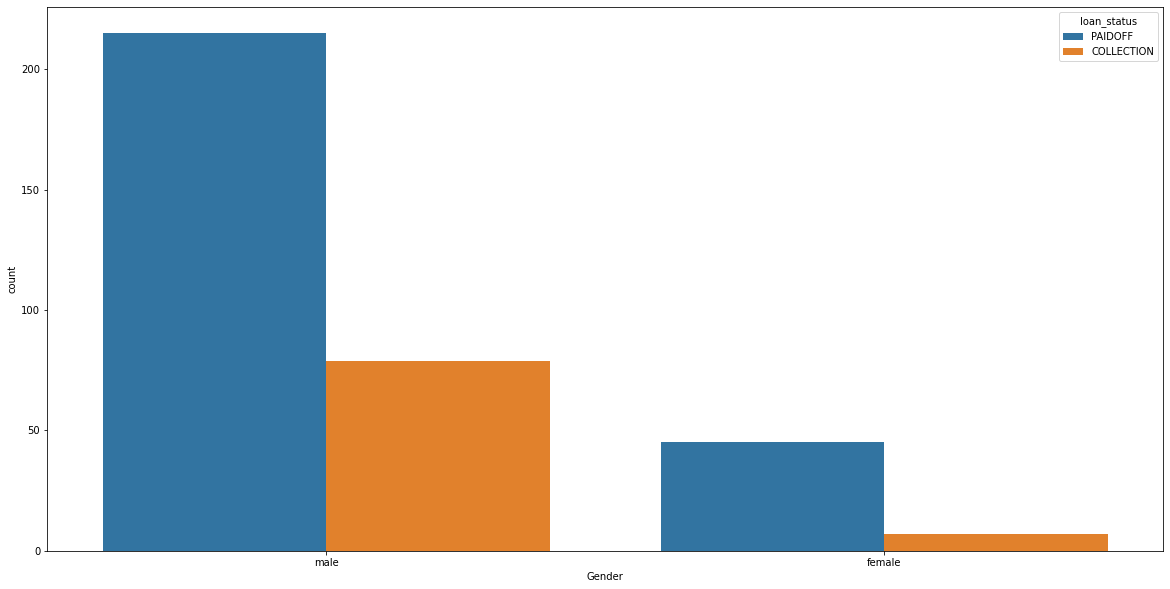

In [29]:
sns.countplot(x='Gender', hue='loan_status' , data=df1)

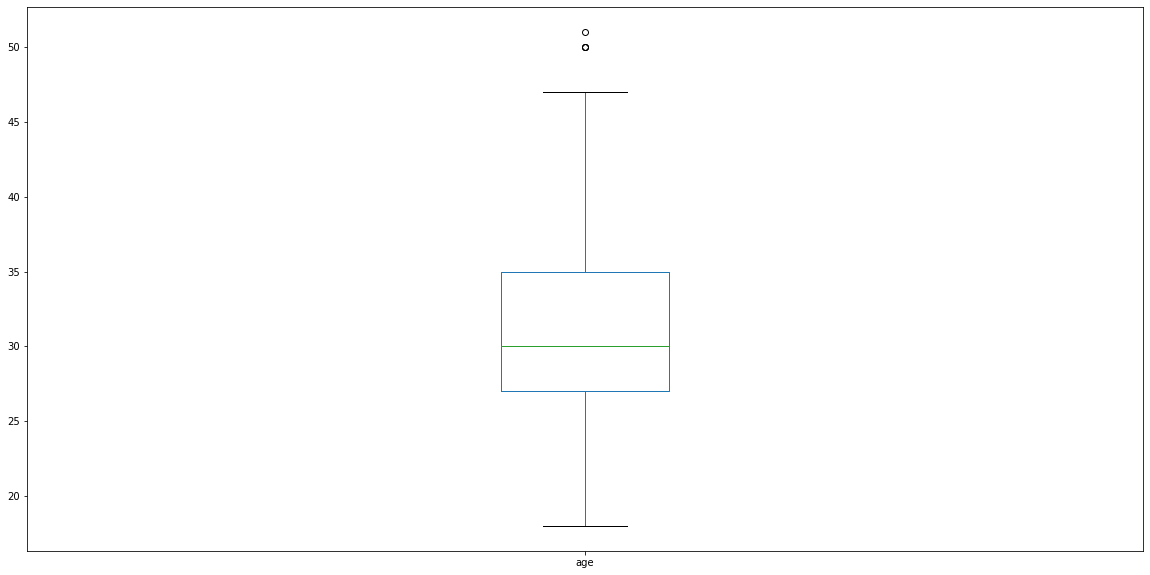

In [30]:
df1.plot(x="loan_status", y=["Gender", "age"], kind="box")

In [31]:
df1['dayofweek']= df1['effective_date'].dt.dayofweek
df1

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1
...,...,...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,6,1
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,6,1
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0,0
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0,0


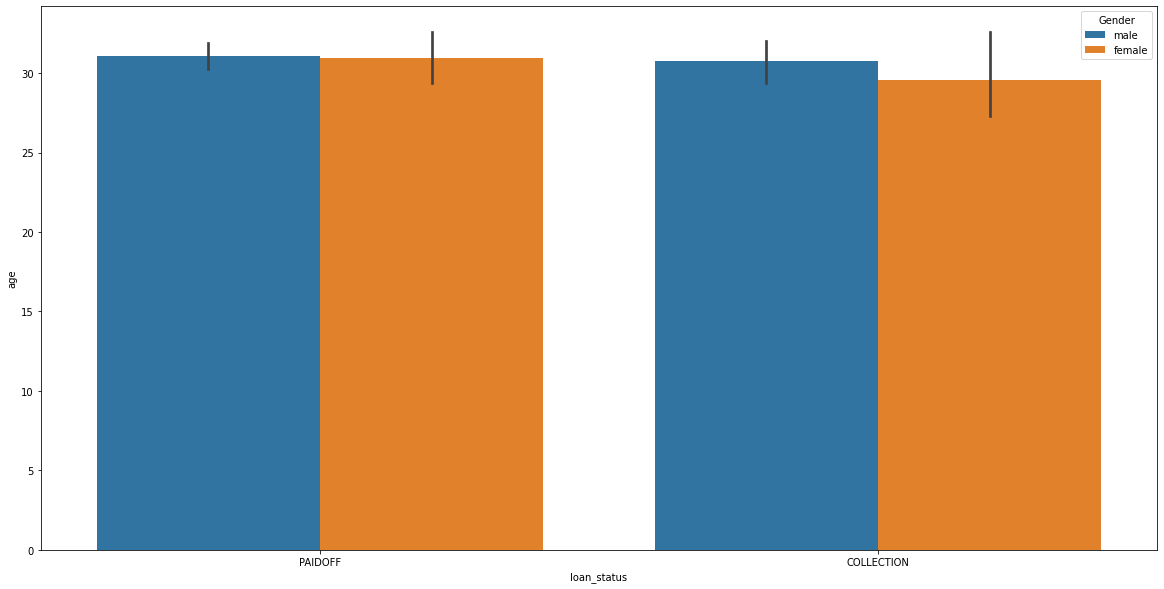

In [32]:
sns.barplot(x='loan_status', y = 'age', hue = 'Gender', data = df1)

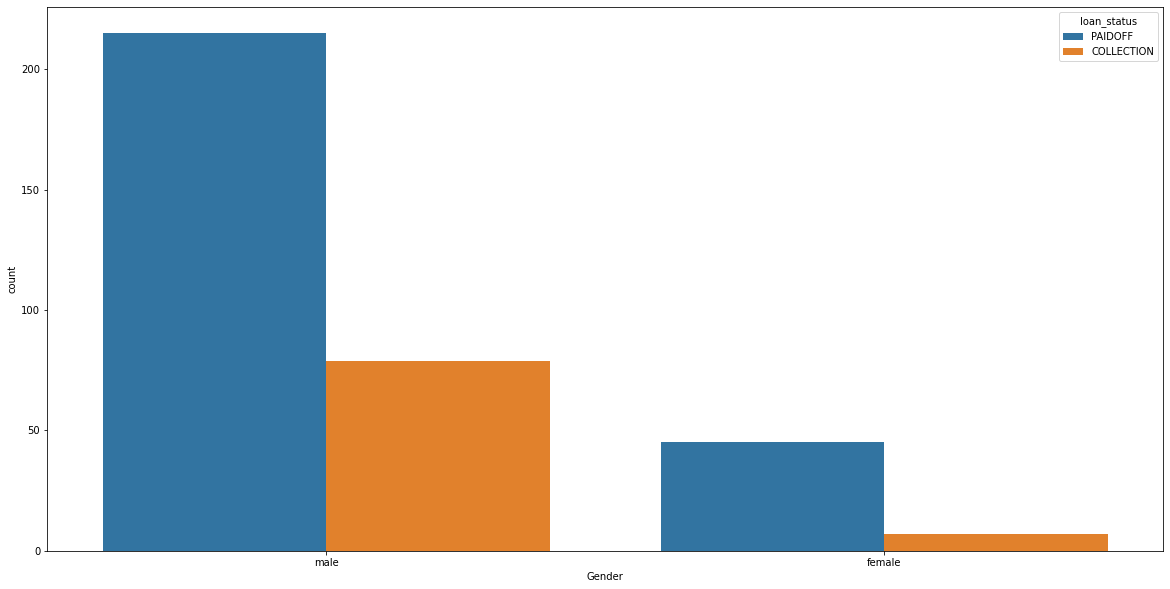

In [33]:
sns.countplot(x='Gender', hue='loan_status' , data=df1)

In [34]:
df1.groupby(['Gender', 'loan_status']).size()

Gender  loan_status
female  COLLECTION       7
        PAIDOFF         45
male    COLLECTION      79
        PAIDOFF        215
dtype: int64

In [35]:
df1

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1
...,...,...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,6,1
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,6,1
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0,0
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0,0


In [36]:
df_gender=pd.get_dummies(df1['Gender'] , prefix='Gender')
df_gender

,Gender_female,Gender_male
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
341,0,1
342,0,1
343,0,1
344,0,1


In [37]:
df_gender.drop(['Gender_male'], axis=1, inplace=True)
df_gender

,Gender_female
0,0
1,1
2,0
3,1
4,0
...,...
341,0
342,0
343,0
344,0


In [38]:
data = pd.concat([df1, df_gender], axis=1)
data

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,Gender_female
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0,1
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,6,1,0
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,6,1,0
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0,0,0
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0,0,0


In [39]:
data.groupby(['education', 'loan_status']).size()

education             loan_status
Bechalor              COLLECTION      11
                      PAIDOFF         33
High School or Below  COLLECTION      39
                      PAIDOFF        112
Master or Above       COLLECTION       1
                      PAIDOFF          1
college               COLLECTION      35
                      PAIDOFF        114
dtype: int64

In [40]:
df_education=pd.get_dummies(data['education'] , prefix='education')
df_education

,education_Bechalor,education_High School or Below,education_Master or Above,education_college
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
341,0,1,0,0
342,0,1,0,0
343,0,0,0,1
344,0,0,0,1


In [41]:
df_loanstatus=pd.get_dummies(data['loan_status'] , prefix='loan_status')
df_loanstatus.drop('loan_status_COLLECTION', inplace=True, axis=1)
df_loanstatus

,loan_status_PAIDOFF
0,1
1,1
2,1
3,1
4,1
...,...
341,0
342,0
343,0
344,0


In [42]:
data1= pd.concat([df_loanstatus , data , df_education], axis=1)
data1

,loan_status_PAIDOFF,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,Gender_female,education_Bechalor,education_High School or Below,education_Master or Above,education_college
0,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0,0,0,1,0,0
1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0,1,1,0,0,0
2,1,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0,0,0,0,0,1
3,1,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1,1,0,0,0,1
4,1,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,6,1,0,0,1,0,0
342,0,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,6,1,0,0,1,0,0
343,0,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0,0,0,0,0,0,1
344,0,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0,0,0,0,0,0,1


In [43]:
data1.drop(['loan_status' , 'education', 'Gender'], inplace=True, axis=1)
data1


,loan_status_PAIDOFF,Principal,terms,effective_date,due_date,age,dayofweek,weekend,Gender_female,education_Bechalor,education_High School or Below,education_Master or Above,education_college
0,1,1000,30,2016-09-08,2016-10-07,45,3,0,0,0,1,0,0
1,1,1000,30,2016-09-08,2016-10-07,33,3,0,1,1,0,0,0
2,1,1000,15,2016-09-08,2016-09-22,27,3,0,0,0,0,0,1
3,1,1000,30,2016-09-09,2016-10-08,28,4,1,1,0,0,0,1
4,1,1000,30,2016-09-09,2016-10-08,29,4,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0,800,15,2016-09-11,2016-09-25,32,6,1,0,0,1,0,0
342,0,1000,30,2016-09-11,2016-10-10,25,6,1,0,0,1,0,0
343,0,800,15,2016-09-12,2016-09-26,39,0,0,0,0,0,0,1
344,0,1000,30,2016-09-12,2016-11-10,28,0,0,0,0,0,0,1


In [44]:
X=data1[['Principal', 'terms', 'age', 'weekend', 'Gender_female', 'education_Bechalor', 'education_High School or Below', 'education_Master or Above', 'education_college']]
X

,Principal,terms,age,weekend,Gender_female,education_Bechalor,education_High School or Below,education_Master or Above,education_college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,0,1,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
341,800,15,32,1,0,0,1,0,0
342,1000,30,25,1,0,0,1,0,0
343,800,15,39,0,0,0,0,0,1
344,1000,30,28,0,0,0,0,0,1


In [45]:
Y=data1['loan_status_PAIDOFF']
Y

0      1
1      1
2      1
3      1
4      1
      ..
341    0
342    0
343    0
344    0
345    0
Name: loan_status_PAIDOFF, Length: 346, dtype: uint8

In [46]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(X, Y, test_size = 0.35, random_state = 4)


In [47]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:]

array([[ 0.51578458,  0.92071769,  2.33152555, ...,  1.13639374,
        -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ..., -0.87997669,
        -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.87997669,
        -0.07624929,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.87997669,
        -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.87997669,
        -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.87997669,
        -0.07624929,  1.14984679]])

In [48]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(data_train, label_train)
logis_score_train = logis.score(data_train, label_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(data_test, label_test)
print("Testing score: ",logis_score_test)

Training score:  0.7767857142857143
Testing score:  0.7295081967213115


In [49]:
coeff_df = pd.DataFrame(data1.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Correlation"] = pd.Series(logis.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Features,Correlation
4,age,0.384129
7,Gender_female,0.108887
8,education_Bechalor,0.089835
2,effective_date,0.054435
0,Principal,0.002260
5,dayofweek,-0.037716
1,terms,-0.041966
6,weekend,-0.076758
3,due_date,-2.510922
9,education_High School or Below,NaN


In [50]:
#decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(data_train, label_train)
dt_score_train = dt.score(data_train, label_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(data_test, label_test)
print("Testing score: ",dt_score_test)

Training score:  0.9151785714285714
Testing score:  0.7459016393442623


In [51]:
#decision tree
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier()
dt.fit(data_train, label_train)
dt_score_train = dt.score(data_train, label_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(data_test, label_test)
print("Testing score: ",dt_score_test)

Training score:  0.9151785714285714
Testing score:  0.7622950819672131


In [52]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(data_train, label_train)
rfc_score_train = rfc.score(data_train, label_train)
print("Training score: ",rfc_score_train)
rfc_score_test = rfc.score(data_test, label_test)
print("Testing score: ",rfc_score_test)

Training score:  0.9151785714285714
Testing score:  0.7459016393442623


In [53]:
#Model comparison
models = pd.DataFrame({
        'Model'          : ['Logistic Regression',  'Decision Tree', 'Random Forest'],
        'Training_Score' : [logis_score_train,  dt_score_train, rfc_score_train],
        'Testing_Score'  : [logis_score_test, dt_score_test, rfc_score_test]
    })
models.sort_values(by='Testing_Score', ascending=False)

,Model,Training_Score,Testing_Score
1,Decision Tree,0.915179,0.762295
2,Random Forest,0.915179,0.745902
0,Logistic Regression,0.776786,0.729508


In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=1)


In [382]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:]

array([[ 0.51578458,  0.92071769,  2.33152555, ...,  1.13639374,
        -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ..., -0.87997669,
        -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.87997669,
        -0.07624929,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.87997669,
        -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.87997669,
        -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.87997669,
        -0.07624929,  1.14984679]])

In [383]:
from sklearn.linear_model import LogisticRegression



In [384]:
logmodel=LogisticRegression()
logmodel.fit(X_train, Y_train)

C:\Users\Sanjula Mathur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [385]:
predictions= logmodel.predict(X_test)
from sklearn.metrics import classification_report
classification_report(Y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.67      0.08      0.15        24\n           1       0.78      0.99      0.87        80\n\n    accuracy                           0.78       104\n   macro avg       0.72      0.54      0.51       104\nweighted avg       0.76      0.78      0.71       104\n'

In [386]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predictions)


array([[ 2, 22],
       [ 1, 79]], dtype=int64)

In [387]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)

0.7788461538461539